Introduction to Artificial Intelligence - Multi-layer perceptron (MLP)
--

By Isidore Valette and Mathis Favier

IMPORTS : Let's import all the libraries that we need !

In [1]:
import tqdm
import numpy as np
import ast
import os
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

Part 1 - Basic datasets
--

In [2]:
n_samples=5000

A) 2 classes
--

(5000, 2)


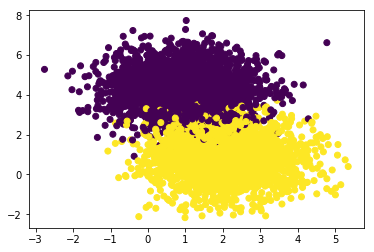

In [3]:
X,Y = sk.datasets.make_blobs(n_samples=n_samples, n_features=2, centers = 2, random_state=0)
print(X.shape)
plt.scatter(X[:,0],X[:,1],c = Y)

Train accuracy :  0.967
Test accuracy :  0.967


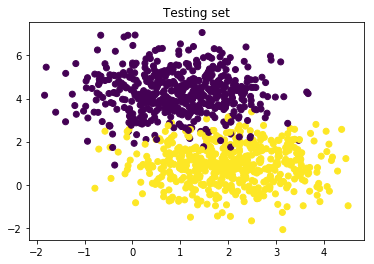

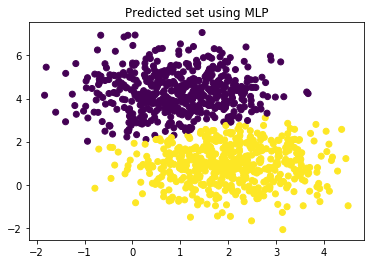

In [4]:
# Here we split the data in 2 parts
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# We train our MLP classifier
classifier = MLPClassifier(tol=1e-3, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# We plot the results
plt.scatter(x_test[:,0],x_test[:,1],c = y_test)
plt.title("Testing set")
plt.figure()
plt.scatter(x_test[:,0],x_test[:,1],c = y_pred)
plt.title("Predicted set using MLP")

print("Train accuracy : ", classifier.score(x_train, y_train, sample_weight=None))
print("Test accuracy : ", classifier.score(x_test, y_test, sample_weight=None))

Training Set:
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1996
          1       0.97      0.96      0.97      2004

avg / total       0.97      0.97      0.97      4000

Training Set Confusion Matrix :
[[1935   61]
 [  71 1933]]


Text(0,0.5,'Predicted class')

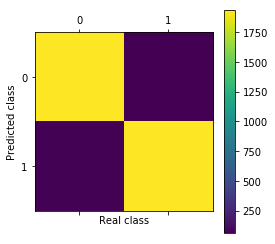

In [5]:
# We plot the confusion matrix and present the report for the training set
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print("Training Set Confusion Matrix :")
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Testing Set Report :
             precision    recall  f1-score   support

          0       0.97      0.96      0.97       504
          1       0.96      0.97      0.97       496

avg / total       0.97      0.97      0.97      1000

Testing Set Confusion Matrix :
[[485  19]
 [ 14 482]]


Text(0,0.5,'Predicted class')

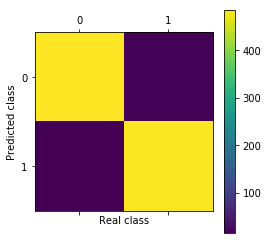

In [6]:
# We plot the confusion matrix and present the report for the testing set
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Testing Set Report :")
print(report)
print("Testing Set Confusion Matrix :")
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

B) 3 Classes
--

(5000, 2)


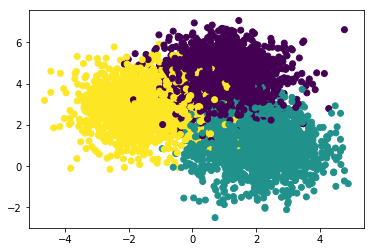

In [7]:
X,Y = sk.datasets.make_blobs(n_samples=n_samples, n_features=2, centers = 3, random_state=0)
print(X.shape)
plt.scatter(X[:,0],X[:,1],c = Y)

Train accuracy :  0.9185
Test accuracy :  0.918


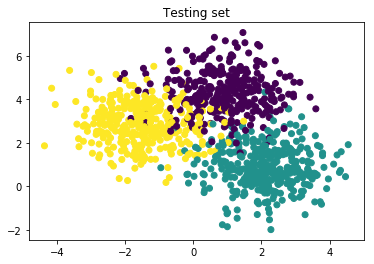

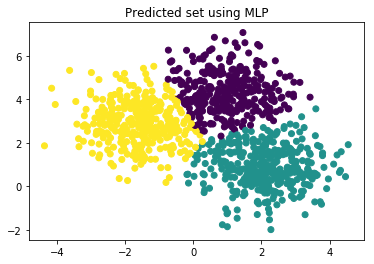

In [8]:
# We plot the confusion matrix and present the report for the training set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

classifier = MLPClassifier(tol=1e-3, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

plt.scatter(x_test[:,0],x_test[:,1],c = y_test)
plt.title("Testing set")
plt.figure()
plt.scatter(x_test[:,0],x_test[:,1],c = y_pred)
plt.title("Predicted set using MLP")

print("Train accuracy : ", classifier.score(x_train, y_train, sample_weight=None))
print("Test accuracy : ", classifier.score(x_test, y_test, sample_weight=None))

Training Set:
             precision    recall  f1-score   support

          0       0.89      0.89      0.89      1361
          1       0.95      0.95      0.95      1304
          2       0.92      0.91      0.92      1335

avg / total       0.92      0.92      0.92      4000

Training Set Confusion Matrix :
[[1218   46   97]
 [  54 1236   14]
 [  97   18 1220]]


Text(0,0.5,'Predicted class')

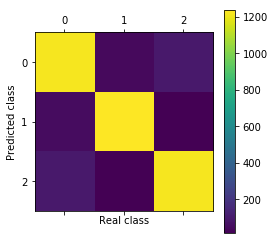

In [9]:
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print("Training Set Confusion Matrix :")
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Testing Set Report :
             precision    recall  f1-score   support

          0       0.89      0.88      0.89       306
          1       0.95      0.96      0.96       363
          2       0.91      0.90      0.90       331

avg / total       0.92      0.92      0.92      1000

Testing Set Confusion Matrix :
[[270  10  26]
 [  9 350   4]
 [ 25   8 298]]


Text(0,0.5,'Predicted class')

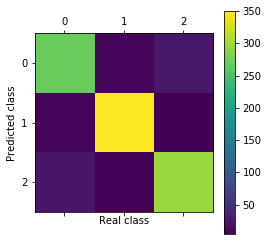

In [10]:
# We plot the confusion matrix and present the report for the testing set
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Testing Set Report :")
print(report)
print("Testing Set Confusion Matrix :")
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Part 2 - PyRat datasets
--

In [11]:
# We import our dataset
x_H15W21 = np.load("x_H15W21.npz")
y_H15W21 = np.load("y_H15W21.npz")

X = x_H15W21["datasource"]
Y = y_H15W21["datasource"]

A) Evolution of the accuracy ...
--

In [12]:
# We define here our function that we'll use in order to get the accuracy knowing the size of the dataset and the way we'll split it
def accuracy_train_test(X, Y, dataset_size, test_perc) :
    x = X[:dataset_size]
    y = Y[:dataset_size]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_perc, random_state = 0)
    # We train the classifier
    classifier = MLPClassifier(tol=1e-3, random_state=0)
    classifier.fit(x_train, y_train)
    train_score = classifier.score(x_train, y_train, sample_weight=None)
    test_score = classifier.score(x_test, y_test, sample_weight=None)
    return (train_score, test_score, x.shape, y.shape)

... changing the dataset size.
--

In [13]:
test_perc = 0.2
dataset_size = 50

train_score_lst = list()
test_score_lst = list()
dataset_size_lst = list()

# We try different sizes
while dataset_size < 2000 :
    train_score, test_score, shapex, shapey = accuracy_train_test(X, Y, dataset_size, test_perc)
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)
    dataset_size_lst.append(dataset_size)
    dataset_size+=50
    

Text(0.5,1,'Evolution of the accuracy with fixed test percentage')

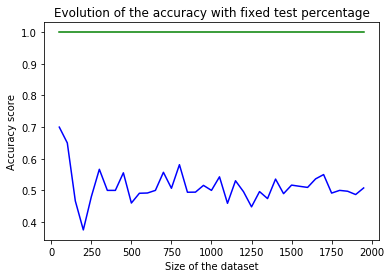

In [14]:
plt.figure(1)
plt.plot(dataset_size_lst, train_score_lst, 'g', dataset_size_lst, test_score_lst, 'b')
plt.ylabel("Accuracy score")
plt.xlabel("Size of the dataset")
plt.title("Evolution of the accuracy with fixed test percentage")

... changing the test percentage.
--

In [15]:
test_perc = 0.1
dataset_size = 2000

train_score_lst = list()
test_score_lst = list()
test_perc_list = list()

# We try different percentages
while test_perc < 1 :
    train_score, test_score, shapex, shapey = accuracy_train_test(X, Y, dataset_size, test_perc)
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)
    test_perc_list.append(test_perc)
    test_perc+=0.05

Text(0.5,1,'Evolution of the accuracy with fixed dataset size')

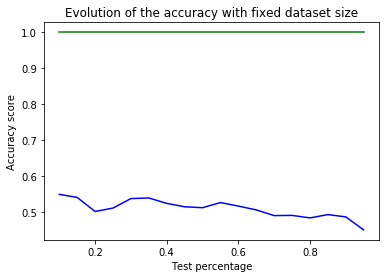

In [16]:
plt.figure(2)
plt.plot(test_perc_list, train_score_lst, 'g', test_perc_list, test_score_lst, 'b')
plt.ylabel("Accuracy score")
plt.xlabel("Test percentage")
plt.title("Evolution of the accuracy with fixed dataset size")

B) Changing the nature of the dataset
--

In [17]:
# Those are the parameters chosen from our previous section, we will stick with them from now on
test_perc = 0.2
dataset_size = 1800

1) Our "normal" dataset
--

Train accuracy : 1.0
Test accuracy : 0.5
Repartition : [833, 216, 751]


(array([833.,   0.,   0.,   0.,   0., 216.,   0.,   0.,   0., 751.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

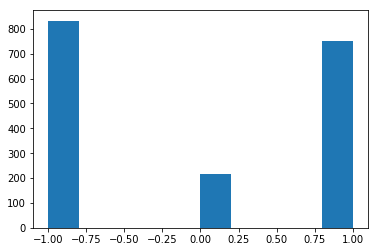

In [18]:
# We cut our dataset to respect the chosen size then split
x = X[:dataset_size]
y = Y[:dataset_size]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_perc, random_state = 0)

# We train the classifier
classifier = MLPClassifier(tol=1e-3, random_state=0)
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train, sample_weight=None)
test_score = classifier.score(x_test, y_test, sample_weight=None)

# Let's train the classifier
classifier = MLPClassifier(tol=1e-3, random_state=0)
classifier.fit(x_train, y_train)

print("Train accuracy :", train_score)
print("Test accuracy :", test_score)

x_list = [-1,0,1]
repartition = [0,0,0]
for k in y :
    repartition[x_list.index(k)]+=1
    
print("Repartition :", repartition)
plt.hist(y)

Training Set:
             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       672
        0.0       1.00      1.00      1.00       171
        1.0       1.00      1.00      1.00       597

avg / total       1.00      1.00      1.00      1440

[[672   0   0]
 [  0 171   0]
 [  0   0 597]]


Text(0.5,1.05,'Training set')

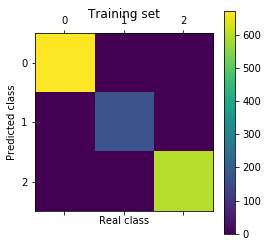

In [19]:
# We plot the confusion matrix and present the report for the trainsing set
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")
plt.title("Training set")

Testing Set Report :
             precision    recall  f1-score   support

       -1.0       0.52      0.63      0.57       161
        0.0       0.12      0.04      0.06        45
        1.0       0.52      0.50      0.51       154

avg / total       0.47      0.50      0.48       360

Testing Set Confusion Matrix :
[[101   6  54]
 [ 25   2  18]
 [ 68   9  77]]


Text(0.5,1.05,'Testing set')

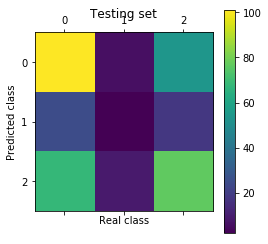

In [20]:
# We plot the confusion matrix and present the report for the testing set
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Testing Set Report :")
print(report)
print("Testing Set Confusion Matrix :")
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")
plt.title("Testing set")

2) A balanced dataset
--

Train accuracy : 1.0
Test accuracy : 0.37950138504155123
Repartition : [600, 601, 600]


(array([600.,   0.,   0.,   0.,   0., 601.,   0.,   0.,   0., 600.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

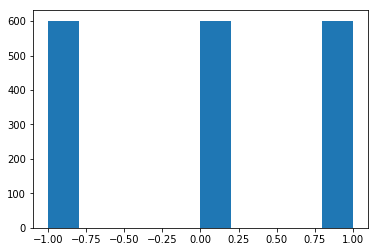

In [21]:
# In this section we are gonna balance the different classes of our dataset
index0 = list()
indexp1 = list()
indexm1 = list()

# We access the index of 600 individuals of each class
for i in range(5000) :
    if Y[i] == 0 and len(index0)<(dataset_size/3+1) :
        index0.append(i)
    if Y[i] == 1 and len(indexp1)<(dataset_size/3) :
        indexp1.append(i)
    if Y[i] == -1 and len(indexm1)<(dataset_size/3) :
        indexm1.append(i)

index = index0 + indexp1 + indexm1
index = np.random.permutation(index) # Don't forget to shuffle !!!!
x = X[index]
y = Y[index]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_perc, random_state = 0)

# We train the classifier
classifier = MLPClassifier(tol=1e-3, random_state=0)
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train, sample_weight=None)
test_score = classifier.score(x_test, y_test, sample_weight=None)

# Let's train the classifier
classifier = MLPClassifier(tol=1e-3, random_state=0)
classifier.fit(x_train, y_train)

print("Train accuracy :", train_score)
print("Test accuracy :", test_score)

x_list = [-1,0,1]
repartition = [0,0,0]
for k in y :
    repartition[x_list.index(k)]+=1
    
print("Repartition :", repartition)
plt.hist(y)

Training Set:
             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       493
        0.0       1.00      1.00      1.00       475
        1.0       1.00      1.00      1.00       472

avg / total       1.00      1.00      1.00      1440

[[493   0   0]
 [  0 475   0]
 [  0   0 472]]


Text(0.5,1.05,'Training set')

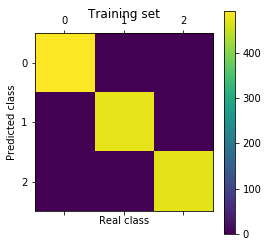

In [22]:
# We plot the confusion matrix and present the report for the training set
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")
plt.title("Training set")

Testing Set Report :
             precision    recall  f1-score   support

       -1.0       0.37      0.41      0.39       107
        0.0       0.39      0.33      0.36       126
        1.0       0.38      0.40      0.39       128

avg / total       0.38      0.38      0.38       361

Testing Set Confusion Matrix :
[[44 28 35]
 [36 42 48]
 [38 39 51]]


Text(0.5,1.05,'Testing set')

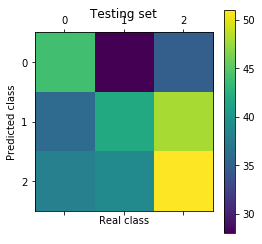

In [23]:
# We plot the confusion matrix and present the report for the testing set
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Testing Set Report :")
print(report)
print("Testing Set Confusion Matrix :")
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")
plt.title("Testing set")

3) A 2-classes dataset
--

Train accuracy : 1.0
Test accuracy : 0.6111111111111112
Repartition : [900, 0, 900]


(array([900.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 900.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

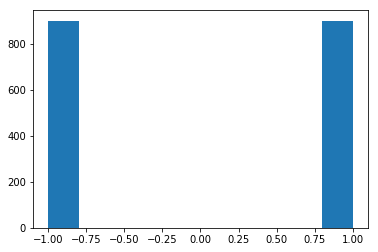

In [24]:
# We are going to get rid of draws
indexp1 = list()
indexm1 = list()

# We select 900 individuals of the 2 other classes
for i in range(5000) :
    if Y[i] == 1 and len(indexp1)<(dataset_size/2) :
        indexp1.append(i)
    if Y[i] == -1 and len(indexm1)<(dataset_size/2) :
        indexm1.append(i)

index = indexp1 + indexm1
index = np.random.permutation(index)
x = X[index]
y = Y[index]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_perc, random_state = 0)

# We train the classifier
classifier = MLPClassifier(tol=1e-3, random_state=0)
classifier.fit(x_train, y_train)
train_score = classifier.score(x_train, y_train, sample_weight=None)
test_score = classifier.score(x_test, y_test, sample_weight=None)

# Let's train the classifier
classifier = MLPClassifier(tol=1e-3, random_state=0)
classifier.fit(x_train, y_train)

print("Train accuracy :", train_score)
print("Test accuracy :", test_score)

x_list = [-1,0,1]
repartition = [0,0,0]
for k in y :
    repartition[x_list.index(k)]+=1
    
print("Repartition :", repartition)
plt.hist(y)

Training Set:
             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       717
        1.0       1.00      1.00      1.00       723

avg / total       1.00      1.00      1.00      1440

[[717   0]
 [  0 723]]


Text(0.5,1.05,'Training set')

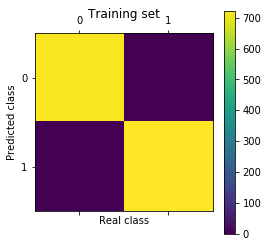

In [25]:
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")
plt.title("Training set")

Testing Set Report :
             precision    recall  f1-score   support

       -1.0       0.63      0.57      0.60       183
        1.0       0.59      0.66      0.62       177

avg / total       0.61      0.61      0.61       360

Testing Set Confusion Matrix :
[[104  79]
 [ 61 116]]


Text(0.5,1.05,'Testing set')

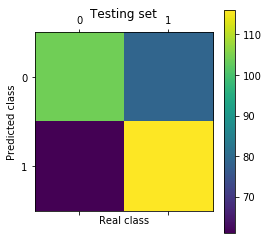

In [26]:
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Testing Set Report :")
print(report)
print("Testing Set Confusion Matrix :")
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")
plt.title("Testing set")

C) Working with the MLP arguments
--

In [27]:
# Those are the parameters chosen from our previous section, we will stick with them from now on
test_perc = 0.2
dataset_size = 2000

In [28]:
# We are going to get rid of draws
indexp1 = list()
indexm1 = list()

# We select 900 individuals of the 2 other classes
for i in range(5000) :
    if Y[i] == 1 and len(indexp1)<dataset_size/2 :
        indexp1.append(i)
    if Y[i] == -1 and len(indexm1)<dataset_size/2 :
        indexm1.append(i)

index = indexp1 + indexm1
index = np.random.permutation(index)
x = X[index]
y = Y[index]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_perc, random_state = 0)

1) Alpha
--

In [29]:
# We define here our function that we'll use in order to get the accuracy knowing the size of the dataset and the way we'll split it
def accuracy_train_test_alpha(X, Y, dataset_size, test_perc, alpha) :
    x = X[:dataset_size]
    y = Y[:dataset_size]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_perc, random_state = 0)
    # We train the classifier
    classifier = MLPClassifier(tol=1e-3, random_state=0, alpha = alpha)
    classifier.fit(x_train, y_train)
    train_score = classifier.score(x_train, y_train, sample_weight=None)
    test_score = classifier.score(x_test, y_test, sample_weight=None)
    return (train_score, test_score, x.shape, y.shape)

In [30]:
train_score_lst = list()
test_score_lst = list()
alpha_list = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

# We try different percentages
for alpha in alpha_list :
    train_score, test_score, shapex, shapey = accuracy_train_test_alpha(X, Y, dataset_size, test_perc, alpha)
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)
    
print("train_score_lst", train_score_lst)
print("test_score_lst", test_score_lst)

train_score_lst [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test_score_lst [0.5025, 0.4975, 0.5, 0.5025, 0.5025, 0.5]


2) Tol
--

In [31]:
# We define here our function that we'll use in order to get the accuracy knowing the size of the dataset and the way we'll split it
def accuracy_train_test_tol(X, Y, dataset_size, test_perc, tol) :
    x = X[:dataset_size]
    y = Y[:dataset_size]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_perc, random_state = 0)
    # We train the classifier
    classifier = MLPClassifier(tol=tol, random_state=0)
    classifier.fit(x_train, y_train)
    train_score = classifier.score(x_train, y_train, sample_weight=None)
    test_score = classifier.score(x_test, y_test, sample_weight=None)
    return (train_score, test_score, x.shape, y.shape)

In [32]:
train_score_lst = list()
test_score_lst = list()
tol_list = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

# We try different percentages
for tol in tol_list :
    train_score, test_score, shapex, shapey = accuracy_train_test_alpha(X, Y, dataset_size, test_perc, tol)
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)
    
print("train_score_lst", train_score_lst)
print("test_score_lst", test_score_lst)

train_score_lst [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
test_score_lst [0.5025, 0.4975, 0.5, 0.5025, 0.5025, 0.5]
